# Logistic regression

In [2]:
from cardio_datasets import full_dataset, reduced_dataset, categorial_dataset, continuous_dataset
from model_selection_and_evaluation_functions import create_train_test_eval_split, search_score_and_evalute_parameters, show_classification_evaluation_metrics

import numpy
import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

## Datasets

In [18]:
categorial_dataset_X_y = create_train_test_eval_split(categorial_dataset, 'cardio')
continuous_dataset_X_y = create_train_test_eval_split(continuous_dataset, 'cardio')
full_dataset_X_y = create_train_test_eval_split(full_dataset, 'cardio')
reduced_dataset_X_y = create_train_test_eval_split(reduced_dataset, 'cardio')

## Hyper Parameter Tuning

In [20]:
BaseLogisticRegression = LogisticRegression(
    solver="saga", multi_class="ovr", max_iter=10000, penalty="elasticnet", random_state=42
)

In [19]:
LogisticRegression_grid_parameters_1 = {"LogisticRegression__l1_ratio": list(numpy.linspace(0,1,10))}

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      7177
           1       0.75      0.66      0.70      7061

    accuracy                           0.72     14238
   macro avg       0.73      0.72      0.72     14238
weighted avg       0.73      0.72      0.72     14238



,param_LogisticRegression__l1_ratio,mean_test_score,std_test_score
0,0.666667,0.662777,0.009063
1,0.777778,0.662777,0.009063
2,0.888889,0.662777,0.009063
3,1.0,0.662777,0.009063
4,0.0,0.662777,0.008900
5,0.111111,0.662777,0.008900
6,0.222222,0.662716,0.008962
7,0.333333,0.662716,0.008962
8,0.444444,0.662716,0.008962
9,0.555556,0.662716,0.008962


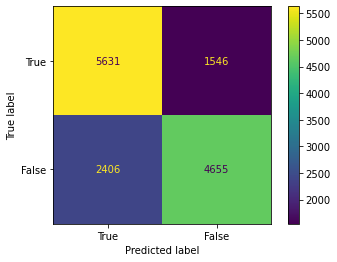

In [21]:
LogisticRegression_StandardScaler_pipeline = Pipeline(
    [
        ("StandardScaler", StandardScaler()),
        ("LogisticRegression", BaseLogisticRegression),
    ]
)
(
    model_1,
    model_1_scores,
    model_1_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    LogisticRegression_StandardScaler_pipeline,
    LogisticRegression_grid_parameters_1,
    "recall",
)
model_1_scores

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      7177
           1       0.75      0.66      0.70      7061

    accuracy                           0.72     14238
   macro avg       0.73      0.72      0.72     14238
weighted avg       0.73      0.72      0.72     14238



,param_LogisticRegression__l1_ratio,mean_test_score,std_test_score
0,0.0,0.663388,0.009266
1,0.222222,0.663327,0.008855
2,0.111111,0.663266,0.008875
3,0.333333,0.663266,0.008635
4,0.444444,0.663266,0.008663
5,0.555556,0.663144,0.008824
6,0.666667,0.663144,0.008765
7,0.777778,0.662777,0.008857
8,0.888889,0.662655,0.008990
9,1.0,0.662594,0.009169


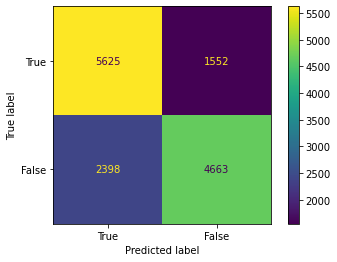

In [22]:
LogisticRegression_MinMaxScaler_pipeline = Pipeline(
    [
        ("MinMaxScaler", MinMaxScaler()),
        (
            "LogisticRegression", BaseLogisticRegression,
        ),
    ]
)
(
    model_2,
    model_2_scores,
    model_2_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    LogisticRegression_MinMaxScaler_pipeline,
    LogisticRegression_grid_parameters_1,
    "recall",
)
model_2_scores

In [30]:
LogisticRegression_grid_parameters_2 = {"LogisticRegression__l1_ratio": [0,0.22], "PolynomialFeatures__degree": [2,5,7]}

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      7177
           1       0.74      0.70      0.72      7061

    accuracy                           0.73     14238
   macro avg       0.73      0.73      0.73     14238
weighted avg       0.73      0.73      0.73     14238



,param_LogisticRegression__l1_ratio,param_PolynomialFeatures__degree,mean_test_score,std_test_score
0,0.22,5,0.696878,0.010519
1,0,5,0.696084,0.009649
2,0.22,7,0.695534,0.008718
3,0,7,0.695289,0.008579
4,0.22,2,0.677322,0.008753
5,0,2,0.675244,0.008267


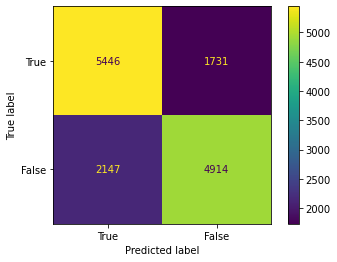

In [31]:
LogisticRegression_PolynomialFeatures_MinMaxScaler_pipeline = Pipeline(
    [
        ("PolynomialFeatures", PolynomialFeatures()),
        ("MinMaxScaler", MinMaxScaler()),
        (
            "LogisticRegression", BaseLogisticRegression,
        ),
    ]
)
(
    model_3,
    model_3_scores,
    model_3_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    LogisticRegression_PolynomialFeatures_MinMaxScaler_pipeline,
    LogisticRegression_grid_parameters_2,
    "recall",
)
model_3_scores

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10232
           1       0.74      0.70      0.72     10108

    accuracy                           0.73     20340
   macro avg       0.73      0.73      0.73     20340
weighted avg       0.73      0.73      0.73     20340



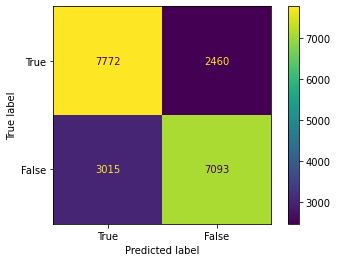

In [32]:
show_classification_evaluation_metrics(model_3, reduced_dataset_X_y['full_split']['X_test'], reduced_dataset_X_y['full_split']['y_test'])

In [34]:
LogisticRegression_grid_parameters_3 = {"LogisticRegression__l1_ratio": [0.22], "PolynomialFeatures__degree": [3,4,6]}

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      7177
           1       0.74      0.70      0.72      7061

    accuracy                           0.73     14238
   macro avg       0.73      0.73      0.73     14238
weighted avg       0.73      0.73      0.73     14238



,param_LogisticRegression__l1_ratio,param_PolynomialFeatures__degree,mean_test_score,std_test_score
0,0.22,6,0.696267,0.009905
1,0.22,4,0.695228,0.008951
2,0.22,3,0.688750,0.008537


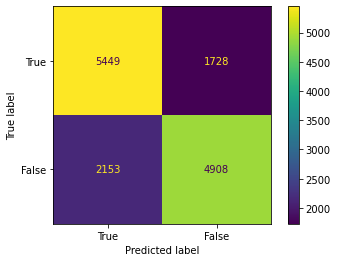

In [35]:
(
    model_4,
    model_4_scores,
    model_4_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    LogisticRegression_PolynomialFeatures_MinMaxScaler_pipeline,
    LogisticRegression_grid_parameters_3,
    "recall",
)
model_4_scores

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10232
           1       0.74      0.70      0.72     10108

    accuracy                           0.73     20340
   macro avg       0.73      0.73      0.73     20340
weighted avg       0.73      0.73      0.73     20340



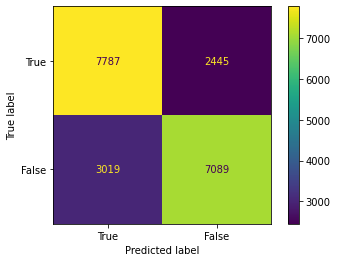

In [36]:
show_classification_evaluation_metrics(model_4, reduced_dataset_X_y['full_split']['X_test'], reduced_dataset_X_y['full_split']['y_test'])

In [39]:
joblib.dump(model_4, './models/evaluation/LogisticRegression_model_4.joblib')

['./models/LogisticRegression_model_4.joblib']

In [3]:
LogisticRegression_pipeline = Pipeline(
    [
        ("PolynomialFeatures", PolynomialFeatures(degree=6)),
        ("MinMaxScaler", MinMaxScaler()),
        (
            "LogisticRegression", LogisticRegression(l1_ratio=0.22, solver="saga", multi_class="ovr", max_iter=10000, penalty="elasticnet"),
        ),
    ]
)
joblib.dump(LogisticRegression_pipeline, './models/pipeline/LogisticRegression_pipeline.joblib')

['./models/pipeline/LogisticRegression_pipeline.joblib']